In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Customer_Engagement_Preferences.csv")

In [3]:
channel_map = {
    1: 'In-Person',
    2: 'E-mail',
    3: 'Phone',
    4: 'Letter',
    5: 'Online'
}

frequency_map = {
    1: 'Daily',
    2: 'Weekly',
    3: 'Monthly',
    4: 'Quarterly',
    5: 'Annually'
}

# Replace numeric codes with labels
df['ENGAGEMENT_TYPE_ID'] = df['ENGAGEMENT_TYPE_ID'].map(channel_map)
df['FREQUENCY_ID'] = df['FREQUENCY_ID'].map(frequency_map)

In [4]:
df.head()

,CUSTOMER_ID,ENGAGEMENT_TYPE_ID,FREQUENCY_ID
0,1944,Letter,Monthly
1,1945,Phone,Quarterly
2,1946,Online,Annually
3,1947,Letter,Weekly
4,1948,E-mail,Monthly


C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3873327741.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Blues_d")


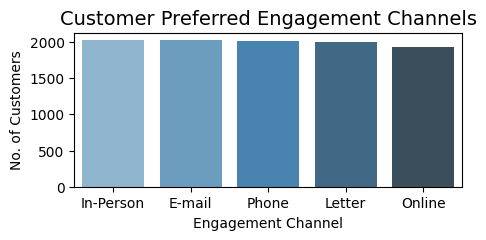

In [5]:
channel_counts = df['ENGAGEMENT_TYPE_ID'].value_counts()

plt.figure(figsize=(5,2))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Blues_d")
plt.title("Customer Preferred Engagement Channels", fontsize=14)
plt.xlabel("Engagement Channel")
plt.ylabel("No. of Customers")
plt.show()

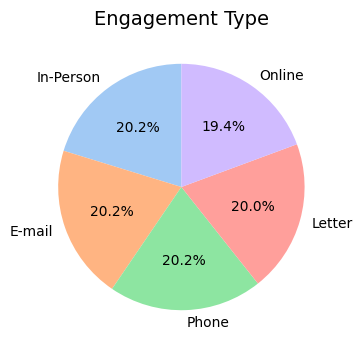

In [6]:
freq_counts = df['ENGAGEMENT_TYPE_ID'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(freq_counts.values, labels=freq_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Engagement Type", fontsize=14)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10228\3195347998.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Blues_d")


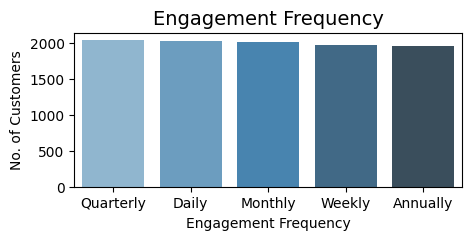

In [7]:
channel_counts = df['FREQUENCY_ID'].value_counts()

plt.figure(figsize=(5,2))
sns.barplot(x=channel_counts.index, y=channel_counts.values, palette="Blues_d")
plt.title("Engagement Frequency", fontsize=14)
plt.xlabel("Engagement Frequency")
plt.ylabel("No. of Customers")
plt.show()

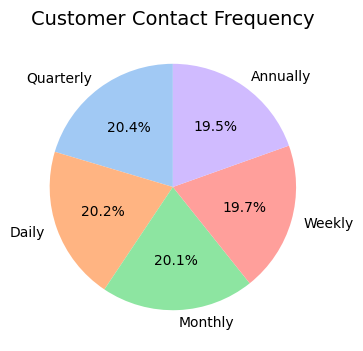

In [8]:
freq_counts = df['FREQUENCY_ID'].value_counts()

plt.figure(figsize=(5,4))
plt.pie(freq_counts.values, labels=freq_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Customer Contact Frequency", fontsize=14)
plt.show()

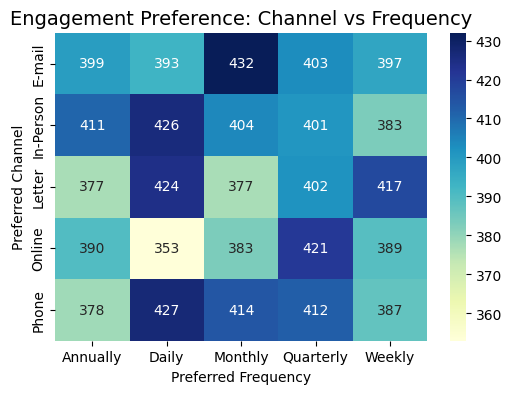

In [9]:
combo = df.groupby(['ENGAGEMENT_TYPE_ID', 'FREQUENCY_ID']).size().unstack()

plt.figure(figsize=(6,4))
sns.heatmap(combo, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Engagement Preference: Channel vs Frequency", fontsize=14)
plt.xlabel("Preferred Frequency")
plt.ylabel("Preferred Channel")
plt.show()

RISK - ENGAGEMENT

In [10]:
df1 = pd.read_csv('Risk-Engagement.csv')

In [11]:
df1.head()

,Customer_Risk_Profile,Preferred_Frequency,Customer_Count
0,1,Annually,8
1,1,Daily,9
2,1,Monthly,7
3,1,Quarterly,9
4,1,Weekly,5


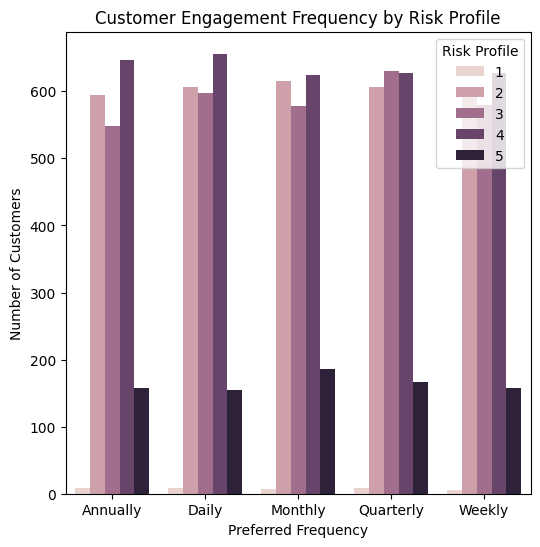

In [12]:
plt.figure(figsize=(6,6))
sns.barplot(
    data=df1,
    x="Preferred_Frequency",
    y="Customer_Count",
    hue="Customer_Risk_Profile"
)
plt.title("Customer Engagement Frequency by Risk Profile")
plt.ylabel("Number of Customers")
plt.xlabel("Preferred Frequency")
plt.legend(title="Risk Profile")
plt.show()

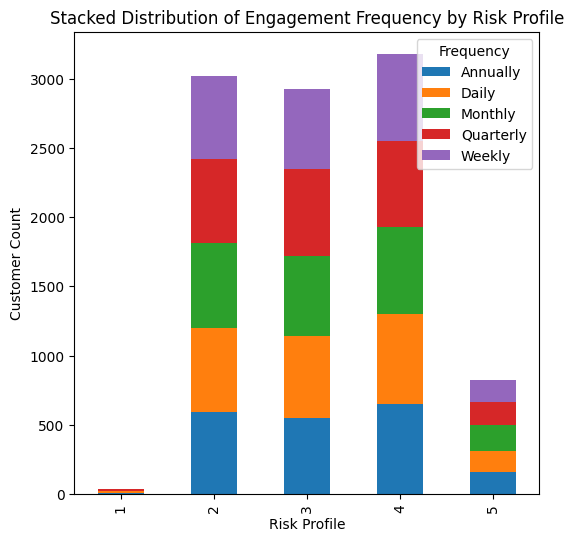

In [13]:
pivot = df1.pivot(index="Customer_Risk_Profile", 
                 columns="Preferred_Frequency", 
                 values="Customer_Count").fillna(0)
pivot.plot(kind="bar", stacked=True, figsize=(6,6))
plt.title("Stacked Distribution of Engagement Frequency by Risk Profile")
plt.ylabel("Customer Count")
plt.xlabel("Risk Profile")
plt.legend(title="Frequency")
plt.show()

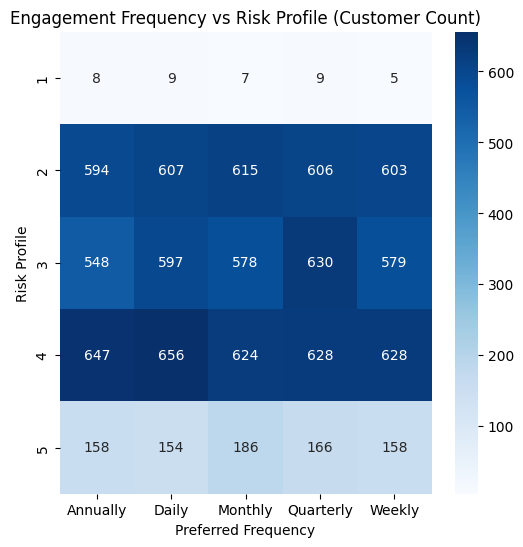

In [14]:
pivot = df1.pivot(index="Customer_Risk_Profile", 
                 columns="Preferred_Frequency", 
                 values="Customer_Count").fillna(0)

plt.figure(figsize=(6,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Engagement Frequency vs Risk Profile (Customer Count)")
plt.ylabel("Risk Profile")
plt.xlabel("Preferred Frequency")
plt.show()

In [15]:
df_ = pd.read_csv("Risk-eng-type.csv")

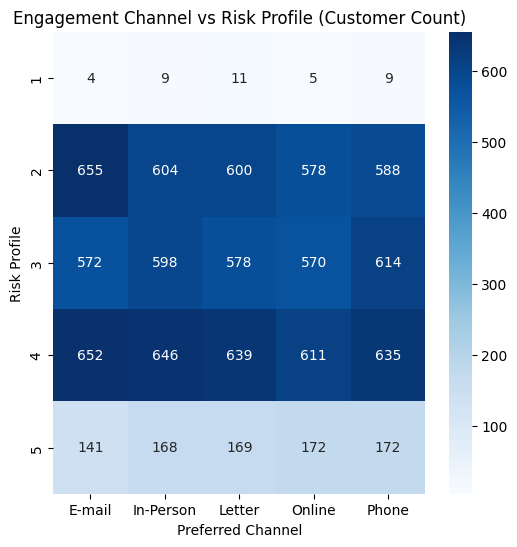

In [16]:
pivot = df_.pivot(index="CUSTOMER_RISK_PROFILE", 
                 columns="PREFERRED_CHANNEL", 
                 values="CUSTOMER_COUNT").fillna(0)

plt.figure(figsize=(6,6))
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Engagement Channel vs Risk Profile (Customer Count)")
plt.ylabel("Risk Profile")
plt.xlabel("Preferred Channel")
plt.show()

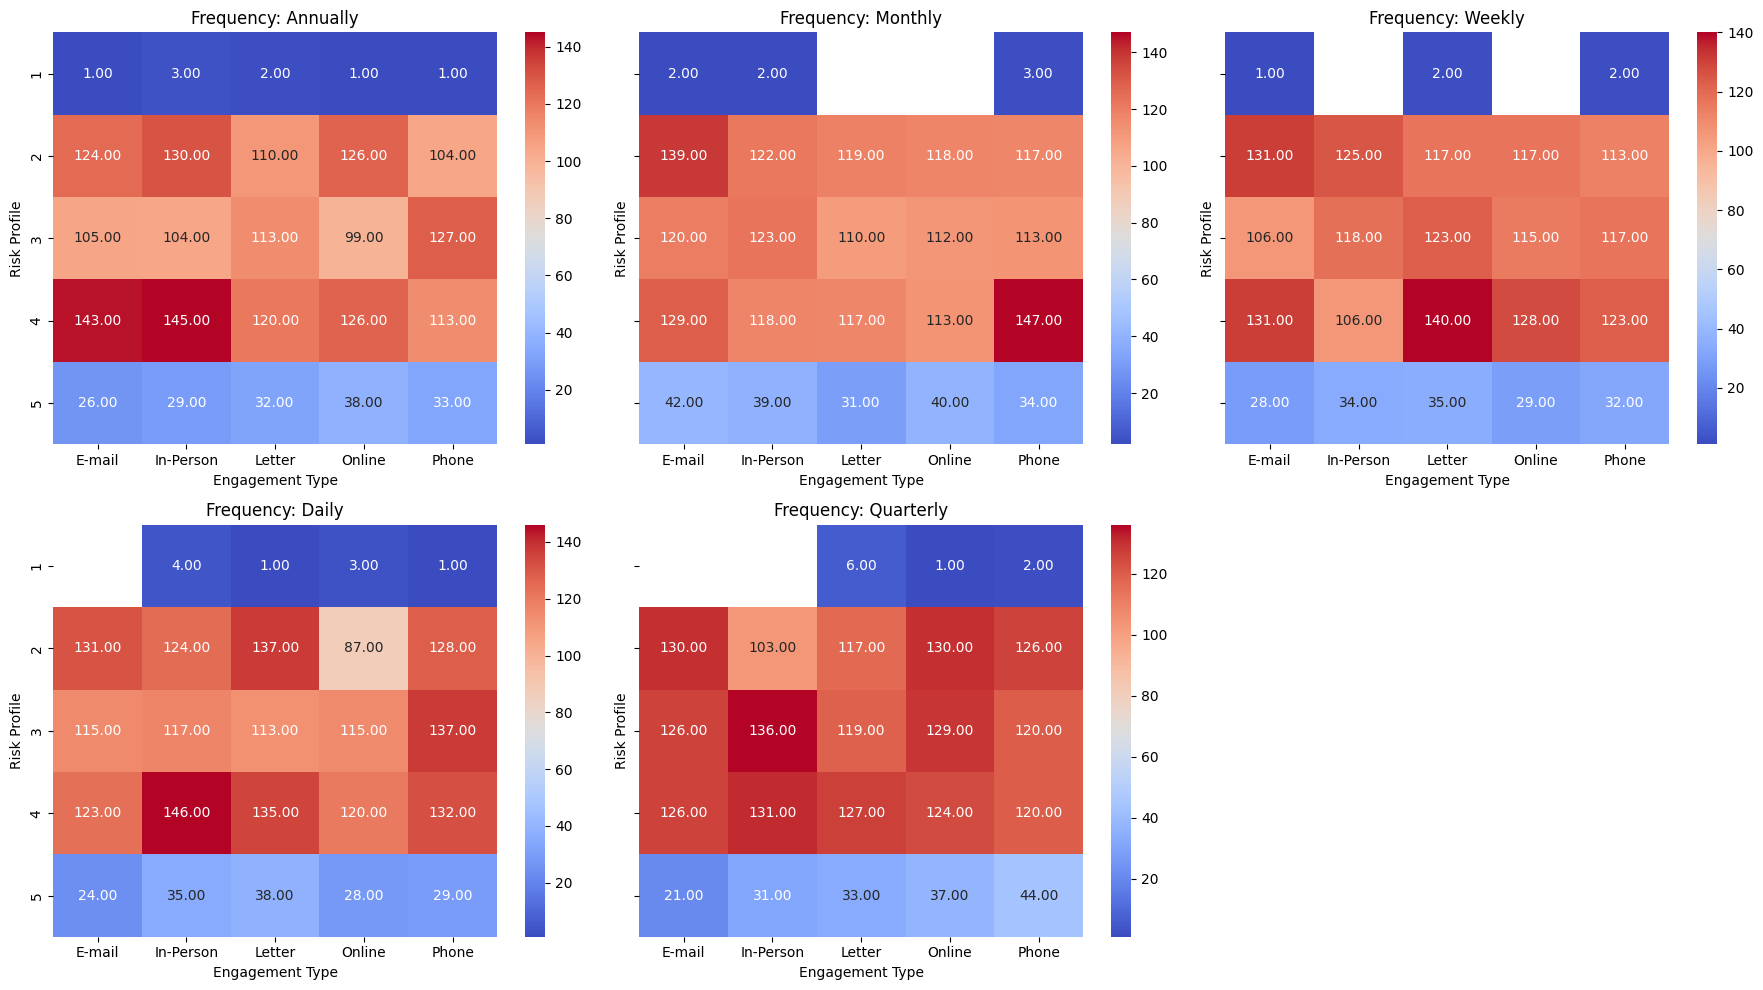

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Risk-eng-type-freq.csv')

# List of unique Frequencies
frequencies = df['PREFERRED_FREQUENCY'].unique()

# Define plot grid size
n_cols = 3
n_rows = (len(frequencies) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), sharey=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, freq in enumerate(frequencies):
    ax = axes[i]
    
    # Filter data for current frequency
    data_subset = df[df['PREFERRED_FREQUENCY'] == freq]
    
    # Pivot table: Risk_Profile vs Engagement_Type
    heatmap_data = data_subset.pivot_table(
        index='CUSTOMER_RISK_PROFILE',
        columns='PREFERRED_CHANNEL',
        values='CUSTOMER_COUNT',
        aggfunc='sum'
    )
    
    sns.heatmap(heatmap_data, annot=True, fmt='0.2f', cmap='coolwarm', ax=ax)
    ax.set_title(f'Frequency: {freq}')
    ax.set_xlabel('Engagement Type')
    ax.set_ylabel('Risk Profile')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import plotly.graph_objects as go

# Load your dataset
df = pd.read_csv('Risk-eng-type-freq.csv')

# Encode categorical fields as numbers for plotting
df['PREFERRED_CHANNEL_CODE'] = df['PREFERRED_CHANNEL'].astype('category').cat.codes
df['PREFERRED_FREQUENCY_CODE'] = df['PREFERRED_FREQUENCY'].astype('category').cat.codes

# Build the 3D Scatter Plot
fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['CUSTOMER_RISK_PROFILE'],
    y=df['PREFERRED_CHANNEL'],  # Use label instead of code
    z=df['CUSTOMER_COUNT'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['PREFERRED_FREQUENCY_CODE'],  # Color still based on frequency code
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(title='Preferred Frequency Code')
    ),
    text=df.apply(
        lambda row: f"Risk: {row['CUSTOMER_RISK_PROFILE']}<br>"
                    f"Channel: {row['PREFERRED_CHANNEL']}<br>"
                    f"Frequency: {row['PREFERRED_FREQUENCY']}<br>"
                    f"Count: {row['CUSTOMER_COUNT']}", axis=1),
    hoverinfo='text',
    name='Customer Count'
))

fig.update_layout(
    scene=dict(
        xaxis_title='Risk Profile',
        yaxis_title='Preferred Channel',
        zaxis_title='Customer Count'
    ),
    title='3D Scatter Plot: Risk vs Preferred Channel vs Customer Count',
    margin=dict(l=0, r=0, b=0, t=50)
)

# Save as HTML
fig.write_html('3d_risk_engagement_plot.html')
print("Plot saved as '3d_risk_engagement_plot.html'. Open in browser for interactive view.")

Plot saved as '3d_risk_engagement_plot.html'. Open in browser for interactive view.


AGE

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

age_df = pd.read_csv('Age-Eng_typ.csv')

In [20]:
sns.set_style('whitegrid')

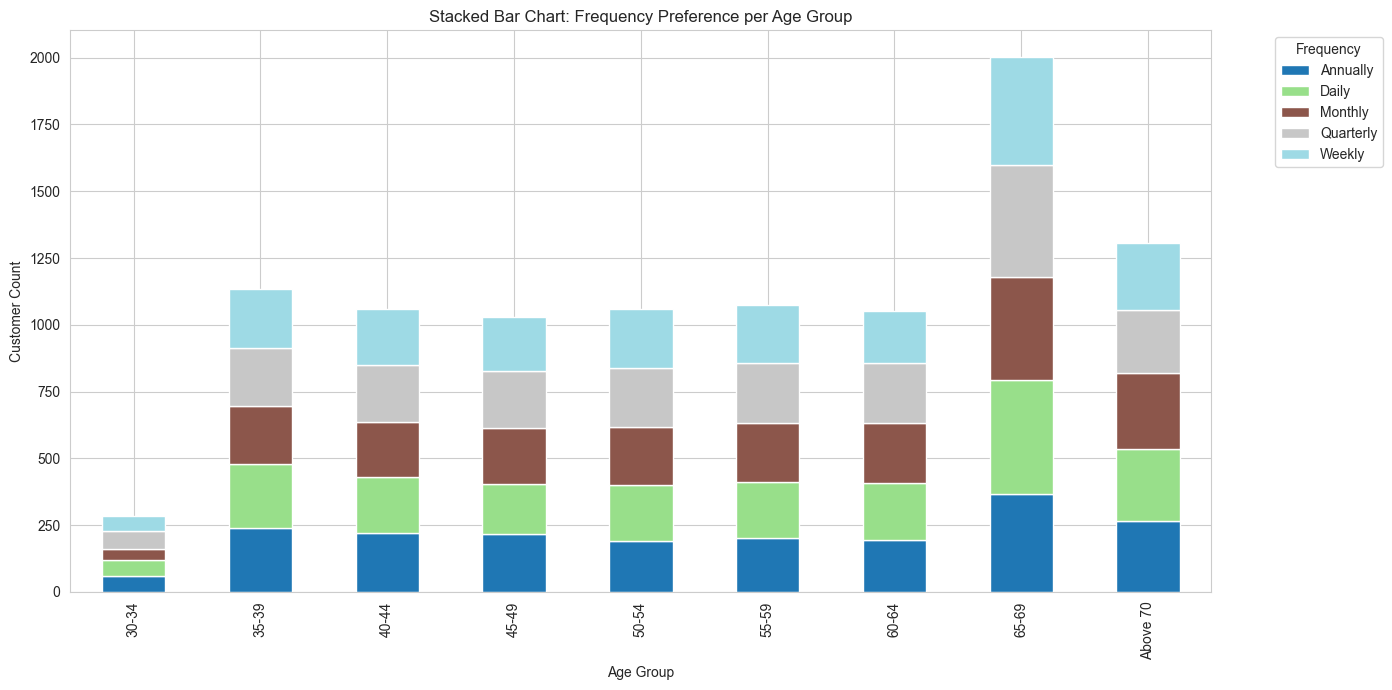

In [21]:
# 2️⃣ Stacked Bar Chart: Frequency Preference per Age Group
age_df = pd.read_csv("Age-Eng_typ_Freq.csv")
age_freq_df = age_df.groupby(['AGE_GROUP', 'FREQUENCY'])['CUSTOMER_COUNT'].sum().unstack()

age_freq_df.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Stacked Bar Chart: Frequency Preference per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.legend(title='Frequency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

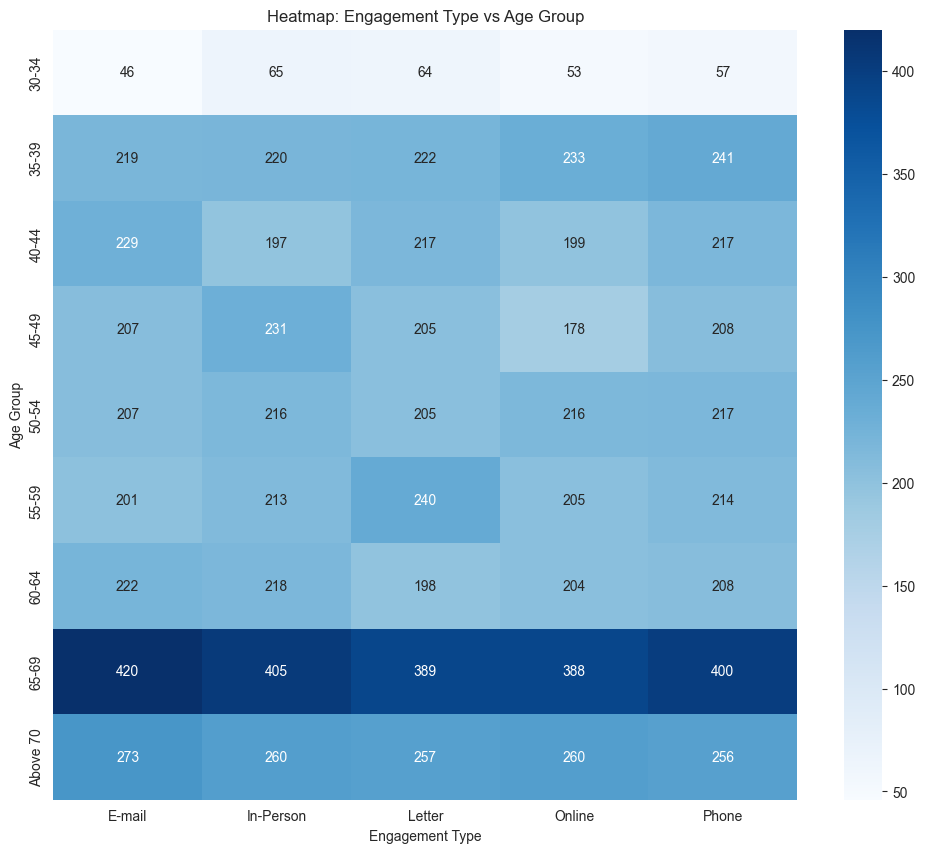

In [22]:
# 1️⃣ Heatmap: Engagement Type vs Age Group (Aggregated over Frequency)
age_heatmap_df = age_df.groupby(['AGE_GROUP', 'ENGAGEMENT_TYPE'])['CUSTOMER_COUNT'].sum().unstack()

plt.figure(figsize=(12, 10))
sns.heatmap(age_heatmap_df, annot=True, fmt='d', cmap='Blues')
plt.title('Heatmap: Engagement Type vs Age Group')
plt.xlabel('Engagement Type')
plt.ylabel('Age Group')
plt.show()

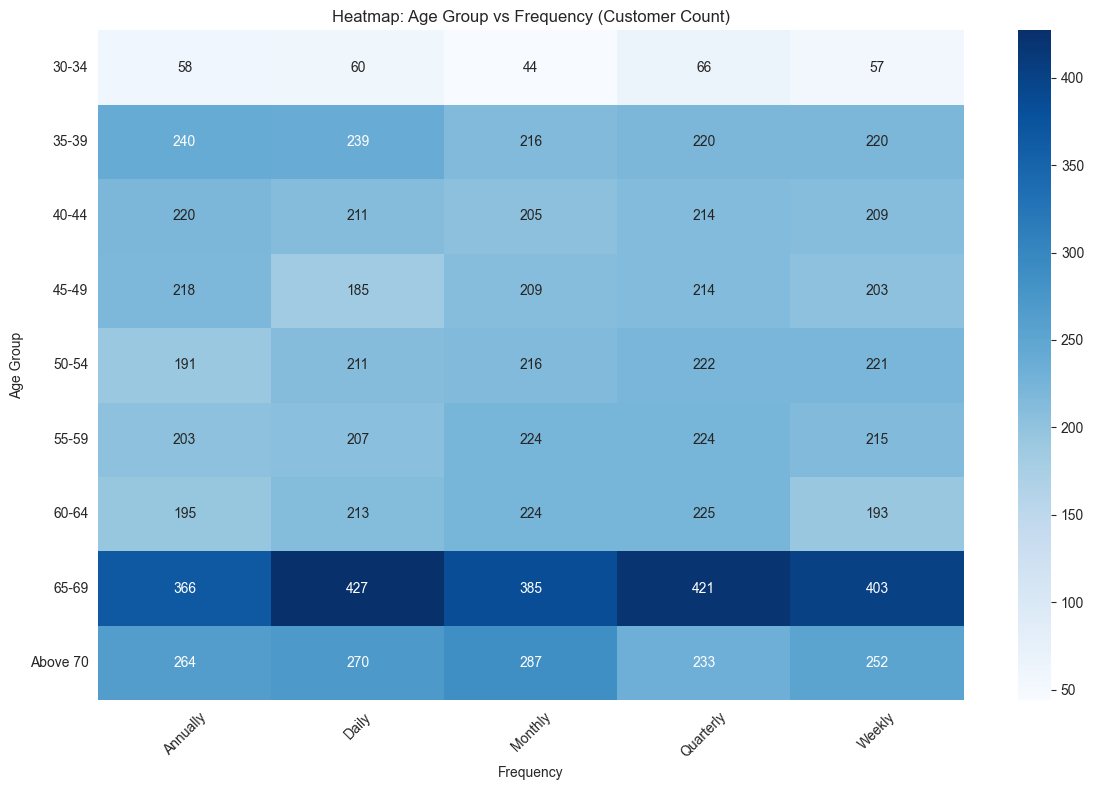

In [23]:
df = pd.read_csv('Age-Eng_typ_freq.csv')

# Pivot table: AGE_GROUP (rows) vs FREQUENCY (columns)
heatmap_data = df.pivot_table(
    index='AGE_GROUP',
    columns='FREQUENCY',
    values='CUSTOMER_COUNT',
    aggfunc='sum'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='Blues')

plt.title('Heatmap: Age Group vs Frequency (Customer Count)')
plt.xlabel('Frequency')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


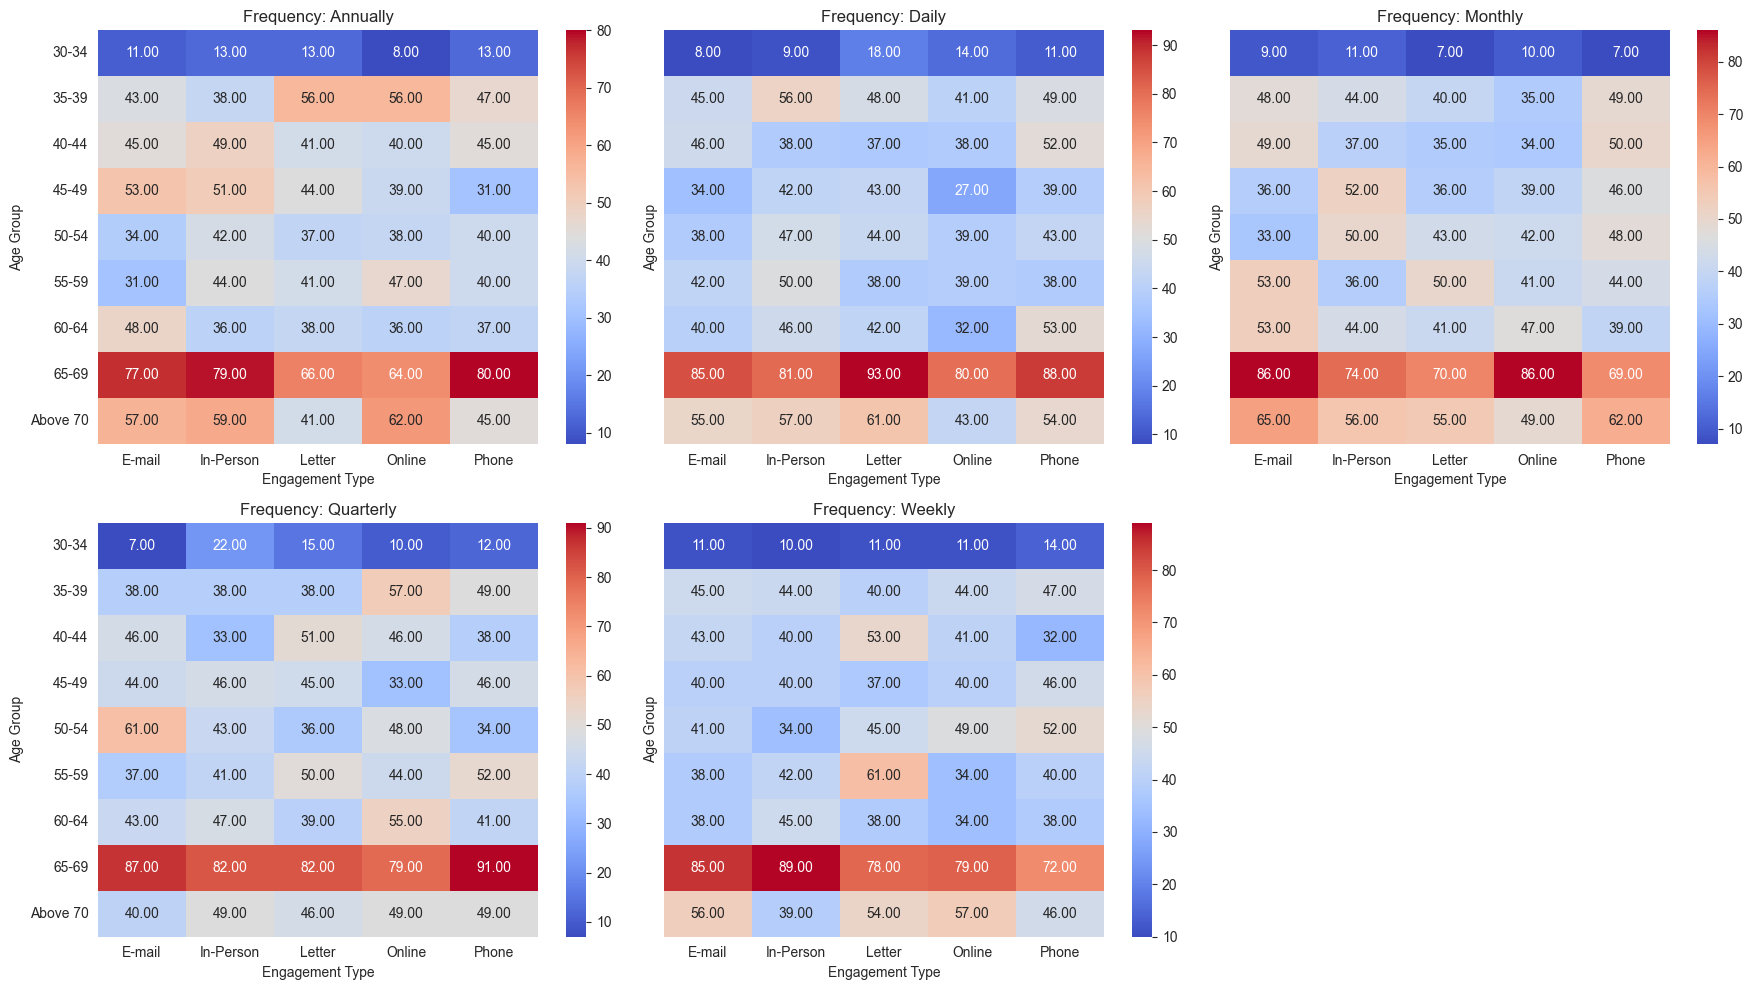

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Age-Eng_typ_Freq.csv')

# List of unique Frequencies
frequencies = df['FREQUENCY'].unique()

# Define plot grid size
n_cols = 3
n_rows = (len(frequencies) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5 * n_rows), sharey=True)

# Flatten axes array for easy indexing
axes = axes.flatten()

for i, freq in enumerate(frequencies):
    ax = axes[i]
    
    # Filter data for current frequency
    data_subset = df[df['FREQUENCY'] == freq]

    # Pivot table: Age_Group vs Engagement_Type
    heatmap_data = data_subset.pivot_table(
        index='AGE_GROUP',
        columns='ENGAGEMENT_TYPE',
        values='CUSTOMER_COUNT',
        aggfunc='sum'
    )
    
    sns.heatmap(heatmap_data, annot=True, fmt='0.2f', cmap='coolwarm', ax=ax)
    ax.set_title(f'Frequency: {freq}')
    ax.set_xlabel('Engagement Type')
    ax.set_ylabel('Age Group')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


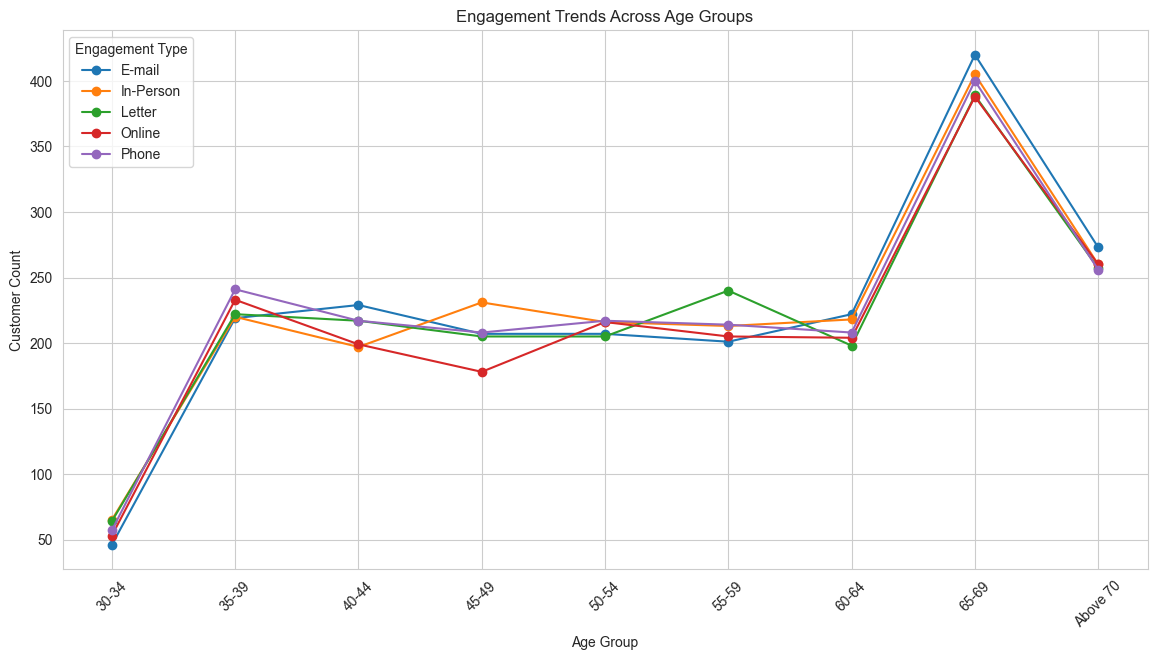

In [25]:
age_trend_df = age_df.groupby(['AGE_GROUP', 'ENGAGEMENT_TYPE'])['CUSTOMER_COUNT'].sum().unstack().reset_index()

plt.figure(figsize=(14, 7))
for engagement_type in age_trend_df.columns[1:]:
    plt.plot(age_trend_df['AGE_GROUP'], age_trend_df[engagement_type], marker='o', label=engagement_type)

plt.title('Engagement Trends Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Type')
plt.grid(True)
plt.show()

In [26]:
state_df = pd.read_csv("State-Eng_type.csv")

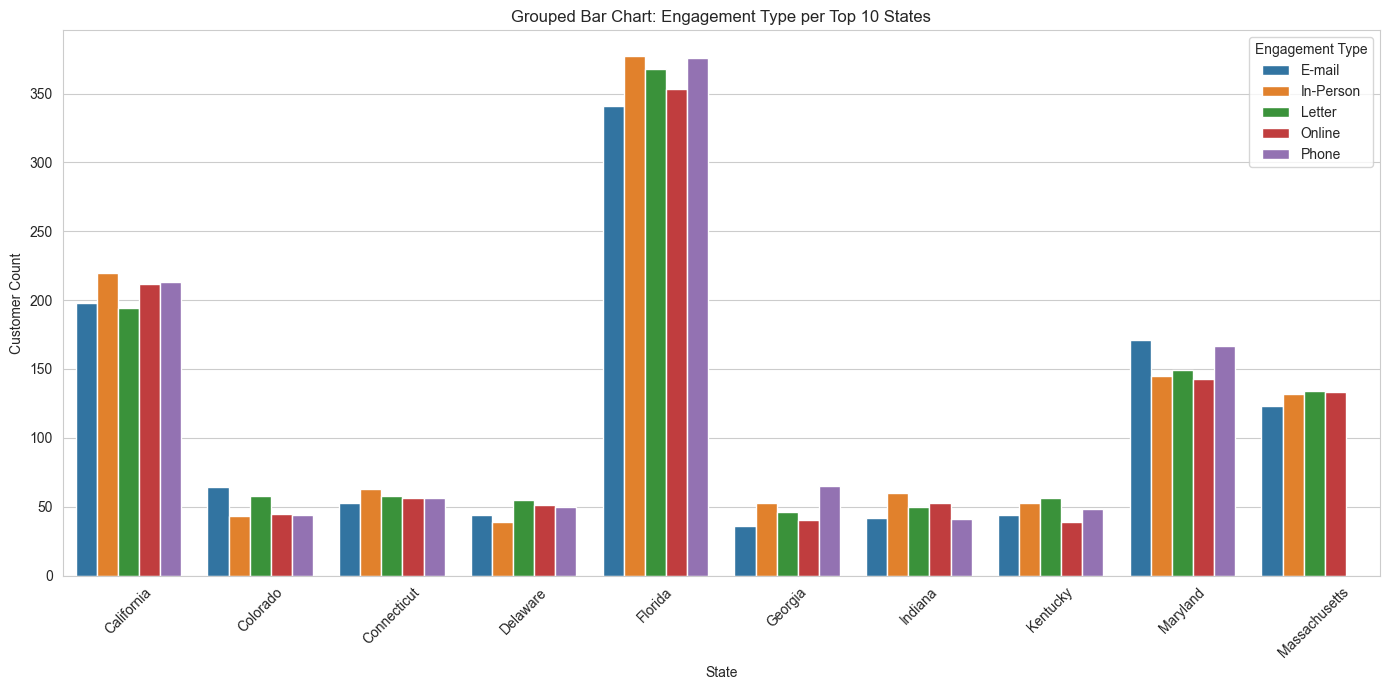

In [29]:
# 6️⃣ Grouped Bar Chart: Engagement Type per Top 10 States
state_total_df = state_df.groupby('STATE')['CUSTOMER_COUNT'].sum().reset_index()
top_states = state_total_df.sort_values(by='CUSTOMER_COUNT', ascending=False).head(10)['STATE'].tolist()
state_top_df = state_df[state_df['STATE'].isin(top_states)]

plt.figure(figsize=(14, 7))
sns.barplot(data=state_top_df, x='STATE', y='CUSTOMER_COUNT', hue='ENGAGEMENT_TYPE')
plt.title('Grouped Bar Chart: Engagement Type per Top 10 States')
plt.xlabel('State')
plt.ylabel('Customer Count')
plt.xticks(rotation=45)
plt.legend(title='Engagement Type')
plt.tight_layout()
plt.show()

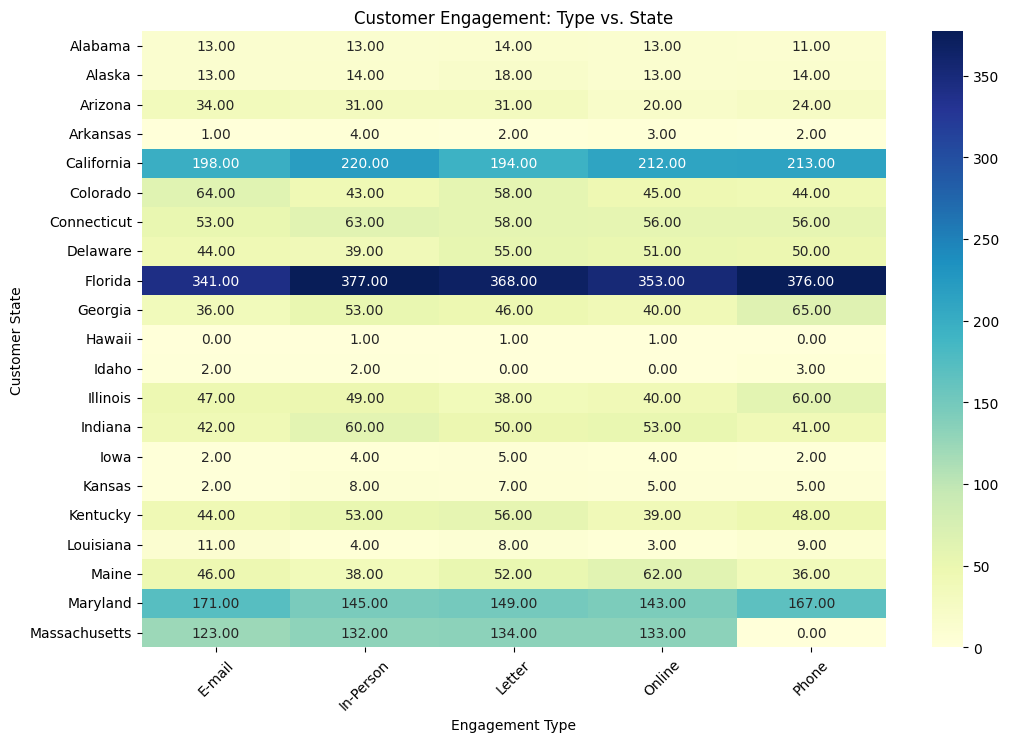

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the CSV file exported from MySQL
df = pd.read_csv('State-Eng_type.csv')


pivot_table = df.pivot_table(
    index='STATE',
    columns='ENGAGEMENT_TYPE',
    values='CUSTOMER_COUNT',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='0.2f', cmap='YlGnBu')
plt.title('Customer Engagement: Type vs. State')
plt.xlabel('Engagement Type')
plt.ylabel('Customer State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

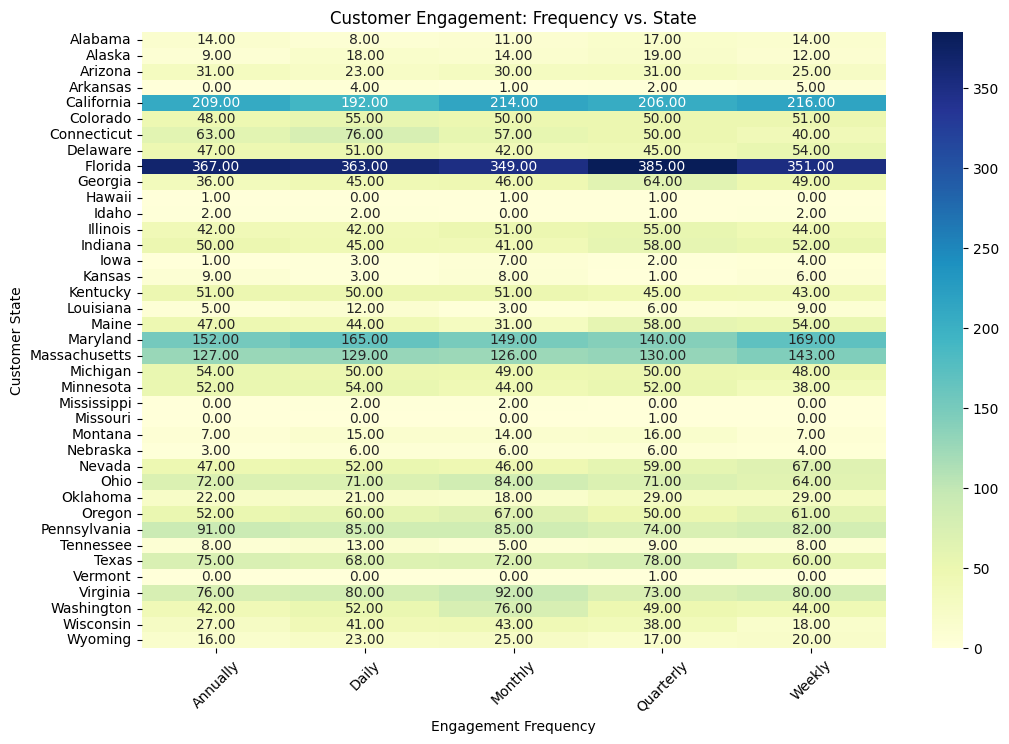

In [8]:
df = pd.read_csv('State-Eng_freq.csv')


pivot_table = df.pivot_table(
    index='STATE',
    columns='FREQUENCY',
    values='CUSTOMER_COUNT',
    fill_value=0
)

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, annot=True, fmt='0.2f', cmap='YlGnBu')
plt.title('Customer Engagement: Frequency vs. State')
plt.xlabel('Engagement Frequency')
plt.ylabel('Customer State')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()